In [1]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




This script is generate a loci file with REF/ALT for the LOH on chr3 -> we can use this to discriminate tumour cell from normals and doubets

In [ ]:
#Load in the raw BAF values from the normals of chr3
normal_BAF <- read.delim("/ASCAT/Q3/Normal_BAF_rawBAF.txt")
head(normal_BAF)

,X,Chromosome,Position,Q3
,<chr>,<chr>,<int>,<dbl>
1,1_809641,1,809641,0.0000000
2,1_812761,1,812761,0.0000000
3,1_817186,1,817186,1.0000000
4,1_818954,1,818954,1.0000000
5,1_825532,1,825532,0.9558824
6,1_825767,1,825767,0.9722222


In [255]:
#Filter on het SNPs -> positions between 0.2 and 0.8
filtered_normal_BAF <- normal_BAF[normal_BAF$Q3 >= 0.2 & normal_BAF$Q3 <= 0.8,]
head(filtered_normal_BAF)

,X,Chromosome,Position,Q3
,<chr>,<chr>,<int>,<dbl>
7,1_833068,1,833068,0.2222222
15,1_873251,1,873251,0.5000000
16,1_873548,1,873548,0.5789474
18,1_896529,1,896529,0.6153846
19,1_896686,1,896686,0.5833333
20,1_896732,1,896732,0.6153846


In [256]:
#Only look for chromosome 3
chr3_BAF <- filtered_normal_BAF[filtered_normal_BAF$Chromosome == 3,]
head(chr3_BAF)

,X,Chromosome,Position,Q3
,<chr>,<chr>,<int>,<dbl>
79742,3_350895,3,350895,0.7333333
79743,3_352610,3,352610,0.3636364
79744,3_352834,3,352834,0.6363636
79745,3_495878,3,495878,0.5000000
79753,3_767148,3,767148,0.5000000
79754,3_1011969,3,1011969,0.3636364


In [257]:
nrow((chr3_BAF))

[1] 10480

In [ ]:
# Go to the tumour BAF and only keep these positions:
tumour_BAF <- read.delim("/ASCAT/Q3/Tumor_BAF_rawBAF.txt")

tumour_BAF <- tumour_BAF[tumour_BAF$Chromosome ==3,]
chr3_tumour_BAF <- tumour_BAF[tumour_BAF$Position %in% chr3_BAF$Position,]
nrow(chr3_tumour_BAF)
head(chr3_tumour_BAF)

[1] 10480

,X,Chromosome,Position,Q3
,<chr>,<chr>,<int>,<dbl>
79742,3_350895,3,350895,0.3181818
79743,3_352610,3,352610,0.7000000
79744,3_352834,3,352834,0.3333333
79745,3_495878,3,495878,0.5000000
79753,3_767148,3,767148,1.0000000
79754,3_1011969,3,1011969,1.0000000


In [ ]:
#Merge with the allelecounts of chromosome 3
allelecounts <- read.delim("/ASCAT/Q3/Q3_alleleFrequencies_chr3.txt")
head(allelecounts)

,X.CHR,POS,Count_A,Count_C,Count_G,Count_T,Good_depth
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr3,12690,12,0,0,0,12
2,chr3,13847,14,0,1,0,15
3,chr3,15110,0,0,23,0,23
4,chr3,15453,0,18,0,0,18
5,chr3,19366,0,15,0,0,15
6,chr3,19435,0,0,0,16,16


In [ ]:
full_data_frame <- left_join(allelecounts, chr3_tumour_BAF, by = c("POS" = "Position"))
full_data_frame

In [261]:
cleaned_full_data <- na.omit(full_data_frame)
head(cleaned_full_data)

,X.CHR,POS,Count_A,Count_C,Count_G,Count_T,Good_depth,X,Chromosome,Q3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
518,chr3,350895,0,0,15,7,22,3_350895,3,0.3181818
519,chr3,352610,0,14,0,6,20,3_352610,3,0.7000000
520,chr3,352834,0,7,0,14,21,3_352834,3,0.3333333
700,chr3,495878,7,0,7,0,14,3_495878,3,0.5000000
924,chr3,767148,0,0,2,0,2,3_767148,3,1.0000000
1240,chr3,1011969,4,0,0,0,4,3_1011969,3,1.0000000


In [262]:
cleaned_full_data <- as.data.frame(cleaned_full_data)

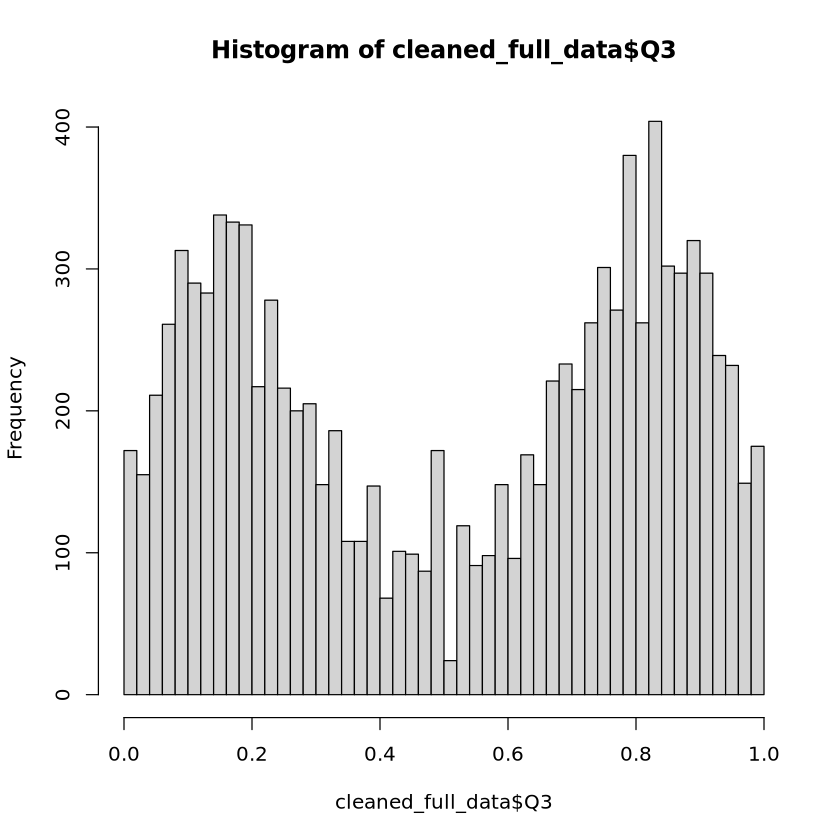

In [263]:
hist(cleaned_full_data$Q3, breaks = 70 )

In [264]:
head(cleaned_full_data)

,X.CHR,POS,Count_A,Count_C,Count_G,Count_T,Good_depth,X,Chromosome,Q3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
518,chr3,350895,0,0,15,7,22,3_350895,3,0.3181818
519,chr3,352610,0,14,0,6,20,3_352610,3,0.7000000
520,chr3,352834,0,7,0,14,21,3_352834,3,0.3333333
700,chr3,495878,7,0,7,0,14,3_495878,3,0.5000000
924,chr3,767148,0,0,2,0,2,3_767148,3,1.0000000
1240,chr3,1011969,4,0,0,0,4,3_1011969,3,1.0000000


In [265]:
df <- cleaned_full_data

In [266]:
# Define mirrorBaf function on a numeric vector (single sample)
mirrorBaf <- function(baf) {
  ifelse(baf > 0.5, baf, 1 - baf)
}

# Add mirrored BAF column
df$Q3_mirrored <- mirrorBaf(df$Q3)


In [267]:
df$Count_A <- as.numeric(df$Count_A)
df$Count_C <- as.numeric(df$Count_C)
df$Count_G <- as.numeric(df$Count_G)
df$Count_T <- as.numeric(df$Count_T)
df$Good_depth <- as.numeric(df$Good_depth)

In [269]:
get_major_minor_alleles <- function(row) {
  # Convert counts and Good_depth to numeric explicitly
  count_A <- as.numeric(row["Count_A"])
  count_C <- as.numeric(row["Count_C"])
  count_G <- as.numeric(row["Count_G"])
  count_T <- as.numeric(row["Count_T"])
  good_depth <- as.numeric(row["Good_depth"])
  baf_mirrored <- as.numeric(row["Q3_mirrored"])

  bafs <- c(
    A = count_A / good_depth,
    C = count_C / good_depth,
    G = count_G / good_depth,
    T = count_T / good_depth
  )
  
  major_allele <- names(which.min(abs(bafs - baf_mirrored)))

  bafs_no_major <- bafs[names(bafs) != major_allele]
  
  minor_allele <- if(length(bafs_no_major) > 0) {
    max_baf <- max(bafs_no_major)
    if (max_baf > 0) {
      names(which.max(bafs_no_major))
    } else {
      "."
    }
  } else {
    "."
  }
  
  c(MINOR = minor_allele, MAJOR = major_allele)
}


In [270]:
alleles <- t(apply(df, 1, get_major_minor_alleles))
df$MAJOR <- alleles[, "MAJOR"]
df$MINOR <- alleles[, "MINOR"]


In [273]:
names(df)

[1] "X.CHR"       "POS"         "Count_A"     "Count_C"     "Count_G"    
 [6] "Count_T"     "Good_depth"  "X"           "Chromosome"  "Q3"         
[11] "Q3_mirrored" "MAJOR"       "MINOR"

In [274]:
getwd()

[1] "/lustre1/project/stg_00096/home/projects/2023_Cools_B-ALL/FINAL_DNA_ANALYSIS/CART_cells_analysis"

In [275]:
write.table(df, file = "Allelecounter_and_BAF_ALT_chr3.txt", sep = "\t", row.names = FALSE, quote = FALSE)

In [ ]:
#now that the vcf is saved; we're going to read it in agian an make a vcf file:
names <- c('X.CHR','POS','Count_A','Count_C','Count_G','Count_T','Good_depth','X','Chromosome','Q3','Q3_mirrored','MAJOR','MINOR')

In [ ]:
txt <- read.table(
  "Allelecounter_and_BAF_ALT_chr3.txt",
  header = TRUE,
  sep = "\t",
  col.names = names
)
head(txt)

In [ ]:
# Prepare VCF 
vcf_lines <- c("##fileformat=VCFv4.2",
               "CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO")


for (i in 1:nrow(txt)) {
  ref <- txt$MINOR[i]  
  alt <- txt$MAJOR[i]
  vcf_line <- paste(txt$X.CHR[i], txt$POS[i], ".", ref, alt, ".", "PASS", paste0("DP=", txt$Good_depth[i]), sep="\t")
  vcf_lines <- c(vcf_lines, vcf_line)
}


In [ ]:
# Write to VCF
writeLines(vcf_lines, "output_chr3_ASCAT.vcf")

In [ ]:
#Now use cellsnp to genotypes thes back